# Context

The dataset comes from Olist, an online marketplace that allows merchants to sell their products without hassle and deliver them to the customers using Olist logistics partners.

The dataset contains information of 100k orders from 2016 to 2018 made in Brazil.  
This is a real dataset with sensible information anonymized. 

<p style="text-align:center;"> <b>Data schema </b></p> 

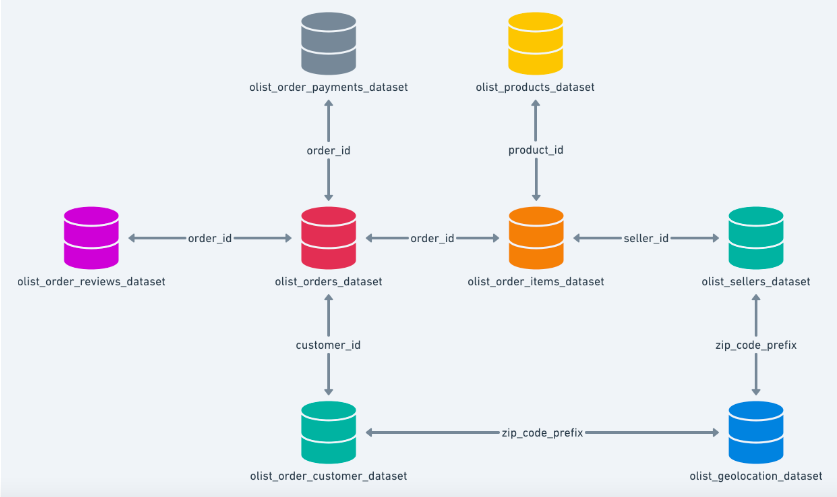

# Introduction

In this notebook, I am going to: 
- explore, describe and clean datasets
- study customer behaviour, payments, pricing and sales trends
- study reviews

# Import packages

In [1]:
import pandas as pd
import duckdb
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from collections import Counter

# Load data 

In [2]:
customers = pd.read_csv('data/olist_customers_dataset.csv')
display(customers.head())

orders = pd.read_csv('data/olist_orders_dataset.csv')
display(orders.head())

ordered_items = pd.read_csv('data/olist_order_items_dataset.csv')
display(ordered_items.head())

payments = pd.read_csv('data/olist_order_payments_dataset.csv')
display(payments.head())

products = pd.read_csv('data/olist_products_dataset.csv')
display(products.head())

reviews = pd.read_csv('data/olist_order_reviews_dataset.csv')
display(reviews.head())

geolocation = pd.read_csv('data/olist_geolocation_dataset.csv')
display(geolocation.head())

sellers = pd.read_csv('data/olist_sellers_dataset.csv')
display(sellers.head())

product_names = pd.read_csv('data/product_category_name_translation.csv')
display(product_names.head())

product_names_dict = {k: v for (k, v) in zip(product_names['product_category_name'], 
                                   product_names['product_category_name_english'])}

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [3]:
# Replace product category name by its english translation
products.insert(1, 'product_category_name_english', products['product_category_name'].map(product_names_dict))
products.drop('product_category_name', axis=1, inplace=True)
display(products.head())

# Delete products_names and product_names_dict from memory because not necessary for further purpose
del product_names, product_names_dict

,product_id,product_category_name_english,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumery,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,art,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,sports_leisure,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,baby,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,housewares,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [4]:
# Transform string date to datetime 
for column_name in ['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date',
                    'order_delivered_customer_date', 'order_estimated_delivery_date'
                   ]:
    orders[column_name] = pd.to_datetime(orders[column_name])

# Duplicate values

In this section, I'm going to inspect if there are duplicates for the identifiers columns such as order_id, customer_id...

In [5]:
print("nb duplicates from orders table = %d" % (orders[orders.duplicated(subset=["customer_id"])].shape[0] +
     orders[orders.duplicated(subset=["order_id"])].shape[0]))

nb duplicates from orders table = 0


# Handling missing values

In [6]:
# Check columns with NaN values, their numbers, percentage 
tables = [customers, orders, ordered_items, payments, products, sellers]
tables_names = ["customers", "orders", "ordered_items", "payments", "products", "sellers"]
for i, df in enumerate(tables):
    print("\n", tables_names[i], df.shape)
    print(pd.concat({"sum": df.isna().sum(), "percentage":df.isna().sum().map(lambda x:
                                                                              f'{x/len(df)*100}%')}, axis=1)
         )
    


 customers (99441, 5)
                          sum percentage
customer_id                 0       0.0%
customer_unique_id          0       0.0%
customer_zip_code_prefix    0       0.0%
customer_city               0       0.0%
customer_state              0       0.0%

 orders (99441, 8)
                                sum           percentage
order_id                          0                 0.0%
customer_id                       0                 0.0%
order_status                      0                 0.0%
order_purchase_timestamp          0                 0.0%
order_approved_at               160  0.1608994278014099%
order_delivered_carrier_date   1783  1.7930229985619612%
order_delivered_customer_date  2965   2.981667521444877%
order_estimated_delivery_date     0                 0.0%

 ordered_items (112650, 7)
                     sum percentage
order_id               0       0.0%
order_item_id          0       0.0%
product_id             0       0.0%
seller_id              0  

In [7]:
# Remove NaN values from products 
print("Shape before", products.shape)
products.dropna(subset=['product_category_name_english', 'product_name_lenght',
                 'product_description_lenght', 'product_photos_qty'
                ], inplace=True)
print("Shape after", products.shape)

Shape before (32951, 9)
Shape after (32328, 9)


In [8]:
# Check which products were ordered for the NaN values from orders table
orders_products = orders.merge(ordered_items,
                               how='left',
                               on='order_id'
                              ).merge(products,
                                      how='inner',
                                      on='product_id'
                                     )
print("shape orders_products", orders_products.shape)
# display(orders_products.head())


shape orders_products (111023, 22)


In [9]:
# plot products distribution of rows with NaN values from orders table
total_products_count = Counter(orders_products['product_category_name_english'])

nan_products = pd.DataFrame(orders_products[orders_products.isna().any(axis=1)].groupby(
    'product_category_name_english').count()["order_id"].reset_index())
nan_products.rename(columns={'product_category_name_english':"categories", 
                                   'order_id': "nan_count"
                                  }, inplace=True)

nan_products["total_count"] = [total_products_count[x] for x in list(nan_products["categories"])]
nan_products = nan_products.assign(nan_percentage=lambda df_: round(df_["nan_count"] / df_["total_count"] * 100, 2))

nan_products.head()

,categories,nan_count,total_count,nan_percentage
0,agro_industry_and_commerce,6,212,2.83
1,air_conditioning,8,297,2.69
2,art,12,209,5.74
3,audio,2,364,0.55
4,auto,96,4235,2.27


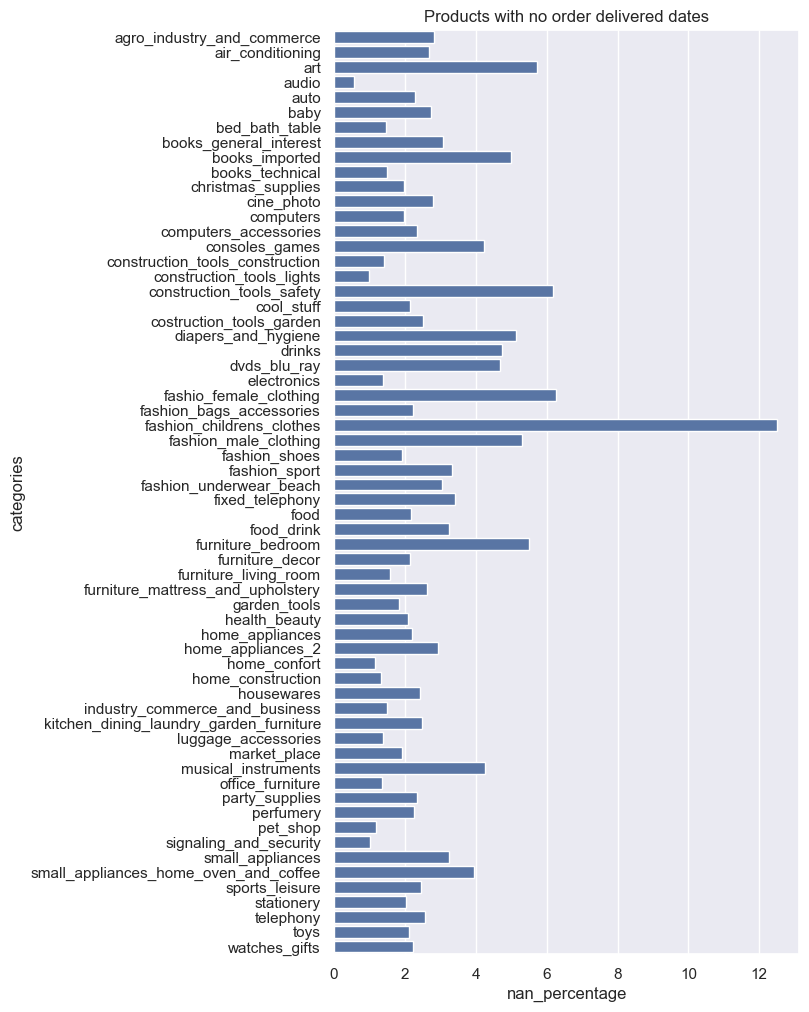

In [10]:
plt.figure(figsize=(6, 12))
sns.barplot(x="nan_percentage", y="categories", data=nan_products)
plt.title('Products with no order delivered dates')
plt.show()

In [11]:
print("nb total products of fashion_childrens_clothes = %d" % total_products_count["fashion_childrens_clothes"])
display(orders_products[orders_products["product_category_name_english"] == "fashion_childrens_clothes"])

nb total products of fashion_childrens_clothes = 8


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,price,freight_value,product_category_name_english,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
10647,3be3bae6f665380f803dc59c9053cf26,03eaeeab9883ef63043d7f0e0325a370,processing,2017-08-06 14:18:45,2017-08-08 04:10:13,NaT,NaT,2017-08-31,1.0,2b18330ce86ae5c606250b75b499f370,...,49.90,16.79,fashion_childrens_clothes,42.0,277.0,3.0,120.0,19.0,11.0,15.0
20429,cb53f0b6e8f9082a9f5a113765dd1236,035c08a68b237ef4afc82109e61a7380,delivered,2018-06-03 22:34:58,2018-06-03 22:50:09,2018-06-04 15:15:00,2018-06-05 21:52:02,2018-06-28,1.0,8cfc3506cedc0626364457d254429118,...,89.99,7.49,fashion_childrens_clothes,47.0,327.0,3.0,300.0,30.0,20.0,20.0
23567,bc3ac768a8963f4ca68942ea6558fc9f,7968f8e8d5429c6a0611671f5a52ed2b,delivered,2018-03-21 09:40:36,2018-03-22 03:09:01,2018-03-22 21:54:58,2018-03-27 20:14:40,2018-04-10,1.0,57bdf3098169cccdb62221bd3e089cbd,...,39.99,6.43,fashion_childrens_clothes,38.0,168.0,1.0,100.0,16.0,16.0,16.0
24265,3da4b0f0c89bb8fee8a810459e641414,2415312e36eac3ab3819f5b7f32522e5,delivered,2017-06-08 16:46:33,2017-06-08 18:20:19,2017-06-12 15:31:40,2017-06-13 13:23:01,2017-06-23,1.0,28ac6af4008a402e5039f3e042a36e13,...,110.00,8.96,fashion_childrens_clothes,48.0,488.0,5.0,500.0,36.0,10.0,26.0
48292,cab08f0417a702d0f4782ec02356a4ac,f4b4417d306cbf8c55ea65c89d0261f7,delivered,2017-09-30 18:54:53,2017-10-03 04:28:12,2017-10-03 18:54:12,2017-10-30 12:37:42,2017-11-01,1.0,8cfc3506cedc0626364457d254429118,...,89.99,17.07,fashion_childrens_clothes,47.0,327.0,3.0,300.0,30.0,20.0,20.0
57796,9fa3a005f89a187501fa1bd63d6125fb,85485f38b20ed1e287120d30cf39ee7d,delivered,2017-10-08 23:51:49,2017-10-09 00:17:50,2017-10-10 20:52:05,2017-10-16 21:59:33,2017-11-08,1.0,57bdf3098169cccdb62221bd3e089cbd,...,39.99,14.10,fashion_childrens_clothes,38.0,168.0,1.0,100.0,16.0,16.0,16.0
95735,b99217b1fcf2fdeace7b8d869b76cb91,8325d6e7af2f2bfb58cf040729b232dd,delivered,2018-03-07 17:42:06,2018-03-07 17:55:36,2018-03-08 20:09:40,2018-03-15 22:04:49,2018-04-02,1.0,57bdf3098169cccdb62221bd3e089cbd,...,39.99,10.15,fashion_childrens_clothes,38.0,168.0,1.0,100.0,16.0,16.0,16.0
97759,ee86b68eb9222b0cad7da50f4f758a35,14acb30bbc064408dcb8cdd3c92b0c97,delivered,2017-05-17 17:44:34,2017-05-17 17:55:12,2017-05-18 16:28:06,2017-05-20 08:44:01,2017-06-09,1.0,0ab3ab3b2869073aa9afe795fe9151aa,...,110.00,14.52,fashion_childrens_clothes,52.0,494.0,4.0,600.0,36.0,10.0,26.0


From the plot here, only the category <b>fashion_childrens_clothes</b> has more than 10 % of NaN values for order_delivered_date. By investigating further, I can see that there are only 8 items for this category and 1 row with NaN. 

From this investigation, it is safe to say that I can delete the rows with NaN because we keep at least 94% of the orders for each product ordered except for the <b>fashion_childrens_clothes</b> category.

In [12]:
# Drop rows with NaN values
orders_products.dropna(subset=["order_approved_at", "order_delivered_carrier_date", 
                               "order_delivered_customer_date"], inplace=True)
print("New shape", orders_products.shape)
print(orders_products[orders_products.isna().any(axis=1)])

New shape (108622, 22)
                               order_id                       customer_id  \
42782  85f8ad45e067abd694b627859fa57453  1d088dea8732788ec35dd4ee6dd76112   

      order_status order_purchase_timestamp   order_approved_at  \
42782    delivered      2017-01-29 21:40:02 2017-01-30 22:32:20   

      order_delivered_carrier_date order_delivered_customer_date  \
42782          2017-02-02 05:04:58           2017-02-07 10:46:00   

      order_estimated_delivery_date  order_item_id  \
42782                    2017-03-08            1.0   

                             product_id  ...   price freight_value  \
42782  09ff539a621711667c43eba6a3bd8466  ...  1934.0          27.0   

       product_category_name_english  product_name_lenght  \
42782                           baby                 60.0   

      product_description_lenght  product_photos_qty  product_weight_g  \
42782                      865.0                 3.0               NaN   

       product_length_cm  pr

# EDA

## Total number of orders delivered and global revenue

In [13]:
query = """
SELECT COUNT(order_id) AS nb_delivered_orders,
CONCAT(ROUND(100*COUNT(order_id) / (SELECT COUNT(order_id) FROM orders), 2), '%') AS pct_delivered_orders
FROM orders
WHERE order_status = 'delivered'
"""

duckdb.sql(query).df()

,nb_delivered_orders,pct_delivered_orders
0,96478,97.02%


In [33]:
query = """
SELECT ROUND(SUM(price + freight_value), 2) AS global_revenue
FROM orders
LEFT JOIN ordered_items 
USING (order_id)
WHERE order_status = 'delivered'
"""

duckdb.sql(query).df()

,global_revenue
0,15419773.75


In [16]:
nb_delivered_orders = len(orders[orders["order_status"] == "delivered"])
print(f'number of delivered orders = {nb_delivered_orders}')

print(f'percentage of delivered orders = {round(100 * nb_delivered_orders/len(orders), 2)} %')

number of delivered orders = 96478
percentage of delivered orders = 97.02 %


In [34]:
print(f'global revenue for delivered orders = {sum(orders_products["price"] + orders_products["freight_value"])}')


global revenue for delivered orders = 15213706.51


Let's notice the discrepancy between the two global revenue values.<br>In the Pandas computation, I had already cleaned the dataset by removing rows with NaN numbers so there is less data compared to the SQL computation.

## Total number of orders delivered, total revenue per year

In [18]:
query = """
SELECT strftime('%Y', 
order_delivered_customer_date) AS year,
count(order_id) AS nb_delivered_orders,
FROM orders o
WHERE o.order_status = 'delivered' AND year is not NULL
GROUP BY year
ORDER BY year
"""

duckdb.sql(query).df()

,year,nb_delivered_orders
0,2016,267
1,2017,40930
2,2018,55273


In [141]:
query = """
SELECT strftime('%Y', 
order_delivered_customer_date) AS year,
SUM(price) AS total_revenue_by_year,
AVG(price) AS avg_revenue_by_year,
MIN(price) AS min_revenue_by_year,
MAX(price) AS max_revenue_by_year
FROM orders o
LEFT JOIN ordered_items oi
USING (order_id)
INNER JOIN products p
USING (product_id)
WHERE (o.order_status = 'delivered' AND year is not NULL
AND p.product_category_name_english IS NOT NULL 
AND o.order_delivered_carrier_date IS NOT NULL
AND o.order_delivered_customer_date IS NOT NULL)
GROUP BY year
ORDER BY year
"""

duckdb.sql(query).df().head()

,year,total_revenue_by_year,avg_revenue_by_year,min_revenue_by_year,max_revenue_by_year
0,2016,4.040509e+04,128.270127,6.00,1399.0
1,2017,5.521716e+06,120.063406,1.20,6735.0
2,2018,7.481982e+06,120.049766,0.85,6729.0


In [43]:
delivered_orders = orders[orders["order_status"] == "delivered"]
tmp=delivered_orders.groupby(
    delivered_orders['order_delivered_customer_date'].dt.strftime("%Y"))["order_id"].count().reset_index()
tmp.rename(columns={"order_delivered_customer_date":'year',
                    "order_id": 'nb_delivered_orders'
                   }, inplace=True)
tmp

,year,nb_delivered_orders
0,2016,267
1,2017,40930
2,2018,55273


In [143]:
delivered_orders = orders_products.loc[orders_products["order_status"] == "delivered", ['order_delivered_customer_date',
                                                                                        "price", "freight_value"]]
#delivered_orders = delivered_orders.assign(total_price=lambda df_: df_["price"] + df_["freight_value"])
tmp = delivered_orders.groupby(
    delivered_orders['order_delivered_customer_date'].dt.strftime("%Y")).agg({
    "price": ["sum", "mean", "min", "max"]}).reset_index()
tmp.rename(columns={"order_delivered_customer_date":'year'},
                                inplace=True)
display(tmp)

year       price                          
                sum        mean   min     max
0  2016    40405.09  128.270127  6.00  1399.0
1  2017  5520095.60  120.064721  1.20  6735.0
2  2018  7481981.59  120.049766  0.85  6729.0

## Number of purchase orders per year_month

In [22]:
query = """
SELECT CONCAT(
strftime('%Y', order_purchase_timestamp),
'-', strftime('%m', 
order_purchase_timestamp)) AS year_month,
count(order_id) AS nb_orders
FROM orders
GROUP BY year_month
ORDER BY year_month
"""

duckdb.sql(query).df()

,year_month,nb_orders
0,2016-09,4
1,2016-10,324
2,2016-12,1
3,2017-01,800
4,2017-02,1780
5,2017-03,2682
6,2017-04,2404
7,2017-05,3700
8,2017-06,3245
9,2017-07,4026


In [23]:
year_month = orders['order_purchase_timestamp'].dt.to_period("M").astype('str')
tmp = orders.groupby(year_month)["order_id"].count().reset_index()
tmp.rename(columns={"order_purchase_timestamp":"year_month",
                    "order_id": 'nb_orders'}, inplace=True)

display(tmp)

,year_month,nb_orders
0,2016-09,4
1,2016-10,324
2,2016-12,1
3,2017-01,800
4,2017-02,1780
5,2017-03,2682
6,2017-04,2404
7,2017-05,3700
8,2017-06,3245
9,2017-07,4026


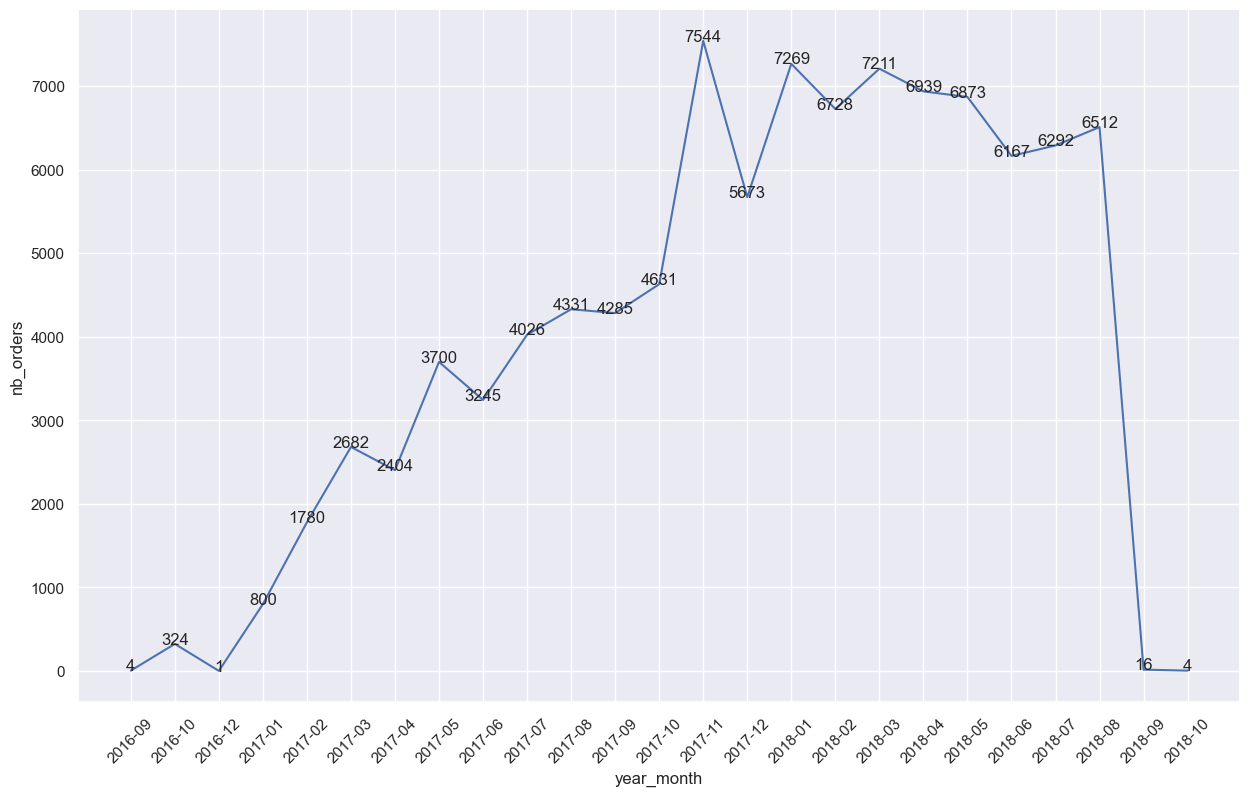

In [24]:
plt.figure(figsize=(15, 9))
sns.lineplot(data=tmp, x="year_month", y="nb_orders")
plt.xticks(rotation=45)
for i in range(len(tmp["year_month"])):
    plt.text(i, tmp["nb_orders"][i], tmp["nb_orders"][i], ha="center")
plt.show()

## Customer purchase behaviour by category

In [137]:
query = """
WITH approved_df AS (
SELECT 
product_category_name_english, 
price, 
customer_unique_id
FROM orders
INNER JOIN customers
USING (customer_id)
INNER JOIN ordered_items
USING (order_id)
LEFT JOIN products
USING (product_id)
WHERE order_approved_at IS NOT NULL 
)

SELECT product_category_name_english, 
COUNT(DISTINCT customer_unique_id) AS nb_customers,
SUM(price) AS total_revenue,
ROUND(AVG(price), 2) AS avg_revenue,
MIN(price) AS min_revenue,
MAX(price) AS max_revenue
FROM approved_df
GROUP BY product_category_name_english
ORDER BY (total_revenue, nb_customers) DESC
"""

duckdb.sql(query).df()

,product_category_name_english,nb_customers,total_revenue,avg_revenue,min_revenue,max_revenue
0,health_beauty,8678,1258681.34,130.16,1.20,3124.00
1,watches_gifts,5547,1205005.68,201.14,8.99,3999.90
2,bed_bath_table,9144,1036854.69,93.29,6.99,1999.98
3,sports_leisure,7513,987979.99,114.36,4.50,4059.00
4,computers_accessories,6557,911954.32,116.51,3.90,3699.99
...,...,...,...,...,...,...
67,flowers,29,1110.04,33.64,15.60,65.90
68,home_comfort_2,23,760.27,25.34,12.90,219.99
69,cds_dvds_musicals,12,730.00,52.14,45.00,65.00
70,fashion_childrens_clothes,8,569.85,71.23,39.99,110.00


The top 3 categories in term of total revenue are: <b>health_beauty, watches_gifts, bed_bath_table</b>. There is a wide range of revenue for these 3 categories. 

People tend to not buy <b>security_and_services, fashion_childrens_clothes</b> from the olist marketplace (at least for the period of collect). 

## Customer purchase behaviour by state

In [138]:
query = """
WITH approved_df AS (
SELECT 
product_category_name_english, 
price, 
customer_state,
customer_unique_id,
order_id
FROM orders
INNER JOIN customers
USING (customer_id)
INNER JOIN ordered_items
USING (order_id)
LEFT JOIN products
USING (product_id)
WHERE order_approved_at IS NOT NULL 
)

SELECT customer_state, 
COUNT(DISTINCT order_id) AS nb_orders,
COUNT(DISTINCT customer_unique_id) AS nb_costumers,
SUM(price) AS total_revenue,
ROUND(AVG(price), 2) AS avg_revenue,
MIN(price) AS min_revenue,
MAX(price) AS max_revenue
FROM approved_df
GROUP BY customer_state
ORDER BY nb_orders DESC
"""

duckdb.sql(query).df()

,customer_state,nb_orders,nb_costumers,total_revenue,avg_revenue,min_revenue,max_revenue
0,SP,41370,39977,5.202376e+06,109.65,0.85,6499.00
1,RJ,12760,12301,1.823915e+06,125.13,0.85,4799.00
2,MG,11541,11175,1.585067e+06,120.76,3.85,4099.99
3,RS,5430,5247,7.497910e+05,120.29,3.06,3124.00
4,PR,4998,4840,6.830838e+05,119.00,2.90,2999.99
5,SC,3612,3513,5.205533e+05,124.65,3.90,3109.99
6,BA,3358,3257,5.113500e+05,134.60,5.20,2999.89
7,DF,2125,2062,3.026039e+05,125.77,4.90,3999.00
8,ES,2025,1956,2.750373e+05,121.91,5.99,6729.00
9,GO,2007,1942,2.945919e+05,126.27,3.90,2740.00


States with the highest numbers of orders and revenue are <b>SP, RJ, MG</b> which are the most populated states in Brazil.

## Customer payments behaviour

In [151]:
query = """
WITH approved_df AS(
SELECT 
order_id,
payment_type, 
payment_installments,
payment_value,
customer_state,
FROM orders 
INNER JOIN customers
USING (customer_id)
INNER JOIN payments
USING (order_id)
WHERE order_approved_at IS NOT NULL 
)

SELECT payment_type,
customer_state,
COUNT(DISTINCT order_id) AS nb_orders
FROM approved_df
WHERE customer_state IN ('SJ', 'RJ', 'MG')
GROUP BY 
GROUPING SETS ((payment_type, customer_state))
ORDER BY nb_orders DESC
"""

duckdb.sql(query).df()

,payment_type,customer_state,nb_orders
0,credit_card,RJ,10245
1,credit_card,MG,9026
2,boleto,MG,2300
3,boleto,RJ,2158
4,voucher,RJ,540
5,voucher,MG,430
6,debit_card,RJ,185
7,debit_card,MG,139
